# Pengolahan Citra Digital

- Nama  = Muhammad Rizky Anugrah
- NIM   = 1306620089
- Kelas = Fisika - B
- Mata Kuliah = Pengolahan Citra Digital

Tugas :
1. Pilihlah salah satu gambar yang akan di analisis (tidak boleh sama antar mahasiswa)  
2. Lakukan transformasi rotasi, affine, perspektif, dan pencerminan
3. Plot gambar masing2 nilai RGB secara terpisah.
4. Plot histogram RGB gambar.

In [20]:
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
from skimage import data, img_as_float, img_as_ubyte, exposure, io, color
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import matplotlib.image as mpimg
import matplotlib.pylab as pylab
from scipy.ndimage import affine_transform, zoom
from scipy import misc
import matplotlib.pyplot as plt

## Fungsi

In [21]:
def plot_image(image, title=''):
    pylab.title(title, size=20), pylab.imshow(image)
    pylab.axis('off') # comment this line if you want axis ticks
    
def plot_hist(r, g, b, title=''):
    r, g, b = img_as_ubyte(r), img_as_ubyte(g), img_as_ubyte(b)
    pylab.hist(np.array(r).ravel(), bins=256, range=(0, 256), color='r', alpha=0.5)
    pylab.hist(np.array(g).ravel(), bins=256, range=(0, 256), color='g', alpha=0.5)
    pylab.hist(np.array(b).ravel(), bins=256, range=(0, 256), color='b', alpha=0.5)
    pylab.xlabel('Pixel Value', size=20), pylab.ylabel('Frequency', size=20)
    pylab.title(title, size=20)

## Nomor 1

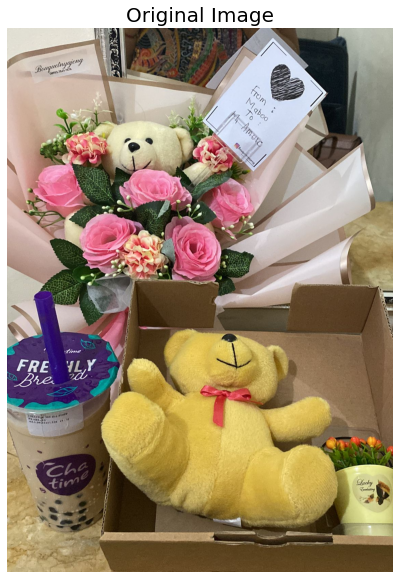

In [22]:
im = Image.open("Gambar.jpeg")
pylab.figure(figsize=(15,10))
plot_image(im, 'Original Image')

## Nomor 2

### Transformasi Rotasi

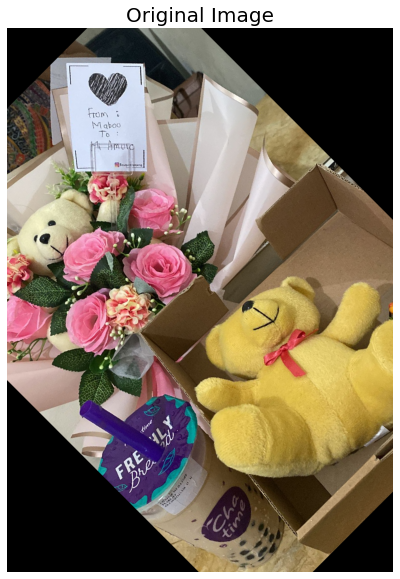

In [23]:
im_45 = im.rotate(45) # rotate the image by 45 degrees
pylab.figure(figsize=(15,10))
plot_image(im_45, 'Original Image')

### Transformasi Affine

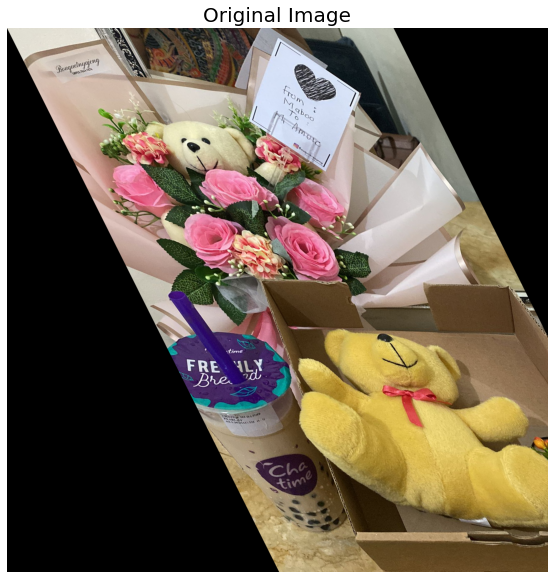

In [24]:
transformasi_affine = im.transform((int(1.4*im.width), im.height), Image.AFFINE, data=(1,-0.5,0,0,1,0))
pylab.figure(figsize=(15,10))
plot_image(transformasi_affine, 'Original Image')

### Transformasi Perspektif

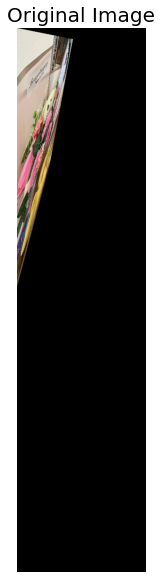

In [25]:
params = [1, 0.1, 0, -0.1, 0.5, 0, -0.005, -0.001]
im1 = im.transform((im.width//3, im.height), Image.PERSPECTIVE, params, Image.BICUBIC)
pylab.figure(figsize=(15,10))
plot_image(im1, 'Original Image')

### Transformasi Pencerminan

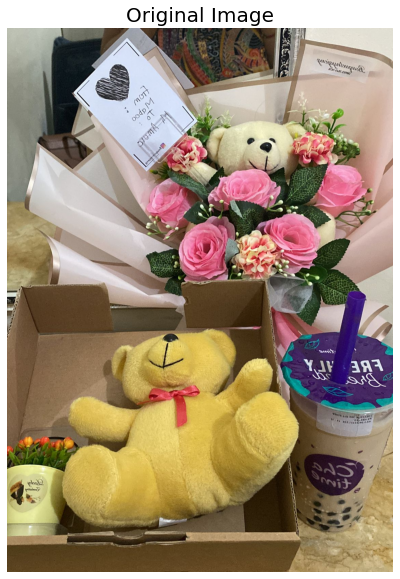

In [26]:
transformasi_pencerminan = im.transpose(Image.FLIP_LEFT_RIGHT)
pylab.figure(figsize=(15,10))
plot_image(transformasi_pencerminan, 'Original Image')

## Nomor 3

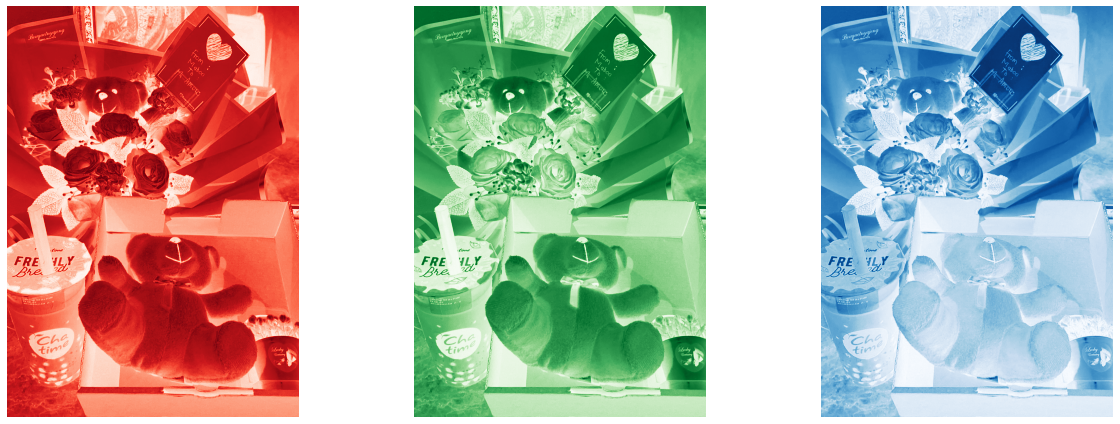

In [27]:
ch_r, ch_g, ch_b = im.split() # split the RGB image into 3 channels: R, Gand B
# we shall use matplotlib to display the channels
plt.figure(figsize=(18,6))
plt.subplot(1,3,1); plt.imshow(ch_r, cmap=plt.cm.Reds); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(ch_g, cmap=plt.cm.Greens); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(ch_b, cmap=plt.cm.Blues); plt.axis('off')
plt.tight_layout()
plt.show() # show the R, G, B channel

## Nomor 4

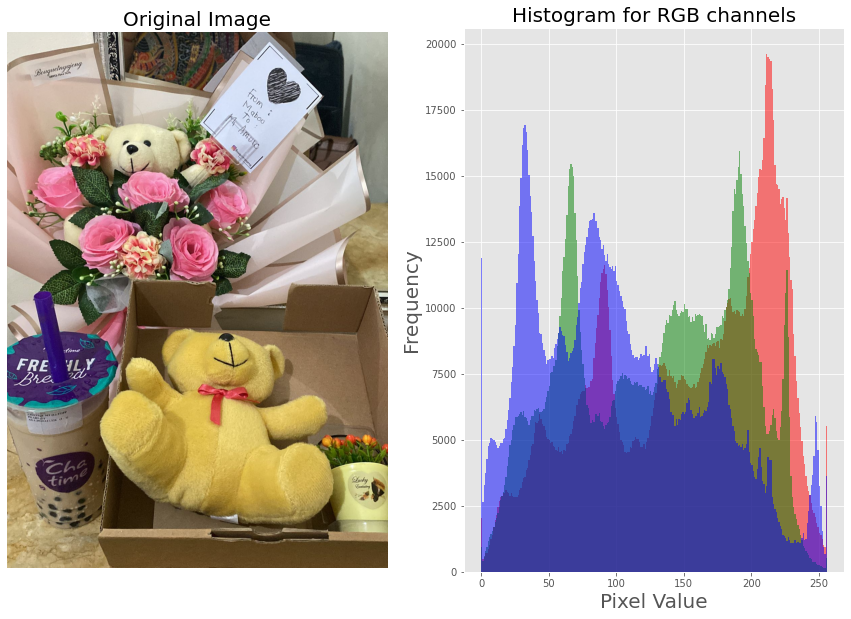

In [28]:
im_r, im_g, im_b = im.split()
pylab.style.use('ggplot')
pylab.figure(figsize=(15,10))
pylab.subplot(121), plot_image(im, 'Original Image')
pylab.subplot(122), plot_hist(im_r, im_g, im_b,'Histogram for RGB channels')
pylab.show()